In [127]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [169]:
# Define function to plot polarization versus intensity for each beaker size

def polarization_v_intensity_by_beaker_size(no_beaker_polarization, small_beaker_polarization, medium_beaker_polarization, large_beaker_polarization, no_beaker_intensity, small_beaker_intensity, medium_beaker_intensity, large_beaker_intensity, polarization_error, no_beaker_intensity_error, small_beaker_intensity_error, medium_beaker_intensity_error, large_beaker_intensity_error, title):
    fig, ax = plt.subplots()
    ax.errorbar(no_beaker_polarization, no_beaker_intensity, xerr=polarization_error, yerr=no_beaker_intensity_error, fmt='o', label='No Beaker')
    ax.errorbar(small_beaker_polarization, small_beaker_intensity, xerr=polarization_error, yerr=small_beaker_intensity_error, fmt='o', label='Small Beaker')
    ax.errorbar(medium_beaker_polarization, medium_beaker_intensity, xerr=polarization_error, yerr=medium_beaker_intensity_error, fmt='o', label='Medium Beaker')
    ax.errorbar(large_beaker_polarization, large_beaker_intensity, xerr=polarization_error, yerr=large_beaker_intensity_error, fmt='o', label='Large Beaker')
    ax.set_xlabel('Polarization (degrees)')
    ax.set_ylabel('Intensity')
    ax.set_title(title)
    ax.legend()
    plt.show()

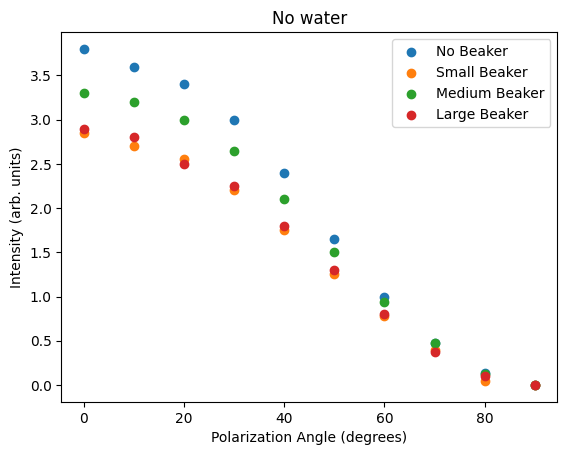

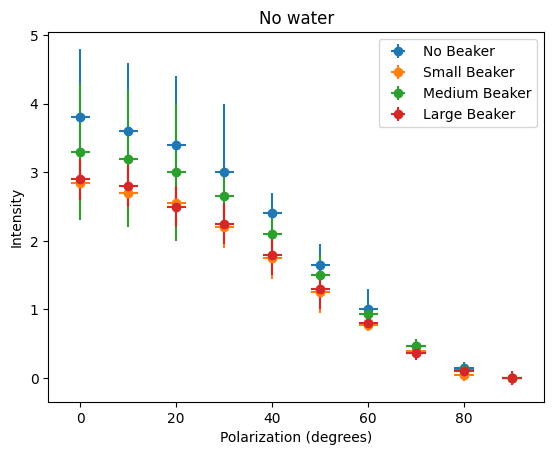

In [171]:
# No beaker (control)
no_beaker_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
no_beaker_intensity = np.array([0.0, 0.14, 0.47, 1.00, 1.65, 2.40, 3.0, 3.4, 3.6, 3.8])

# Small beaker without water
small_beaker_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_intensity = np.array([0.0, 0.05, 0.40, 0.78, 1.25, 1.75, 2.20, 2.55, 2.70, 2.85])

# Medium beaker without water
medium_beaker_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_intensity = np.array([0.0, 0.12, 0.47, 0.94, 1.50, 2.10, 2.65, 3.0, 3.2, 3.3])

# Large beaker without water
large_beaker_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_intensity = np.array([0.0, 0.10, 0.37, 0.80, 1.30, 1.80, 2.25, 2.50, 2.80, 2.90])

# Polarizing lens error (uniform for all sets of data points)
polarization_error_degrees = np.full((len(no_beaker_polarization), ), 2)
# Intensity error for no beaker (different for each set of data points)
no_beaker_intensity_error = np.array([0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 1, 1, 1, 1])
small_beaker_intensity_error = np.array([0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])
medium_beaker_intensity_error = np.array([0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 1, 1, 1])
large_beaker_intensity_error = np.array([0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])


# Plot the data
plt.scatter(no_beaker_polarization, no_beaker_intensity, label='No Beaker')
plt.scatter(small_beaker_polarization, small_beaker_intensity, label='Small Beaker')
plt.scatter(medium_beaker_polarization, medium_beaker_intensity, label='Medium Beaker')
plt.scatter(large_beaker_polarization, large_beaker_intensity, label='Large Beaker')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.title("No water")
plt.legend(loc='best')
plt.show()

# Plot the data
polarization_v_intensity_by_beaker_size(no_beaker_polarization, small_beaker_polarization, medium_beaker_polarization, large_beaker_polarization, no_beaker_intensity, small_beaker_intensity, medium_beaker_intensity, large_beaker_intensity, polarization_error_degrees, no_beaker_intensity_error, small_beaker_intensity_error, medium_beaker_intensity_error, large_beaker_intensity_error, "No water")

In [174]:
# Define function to plot polarization versus intensity for each beaker size without a no beaker parameter

def polarization_v_intensity_by_beaker_size(small_beaker_polarization, medium_beaker_polarization, large_beaker_polarization, small_beaker_intensity, medium_beaker_intensity, large_beaker_intensity, polarization_error, small_beaker_intensity_error, medium_beaker_intensity_error, large_beaker_intensity_error, title):
    fig, ax = plt.subplots()
    ax.errorbar(small_beaker_polarization, small_beaker_intensity, xerr=polarization_error, yerr=small_beaker_intensity_error, fmt='o', label='Small Beaker')
    ax.errorbar(medium_beaker_polarization, medium_beaker_intensity, xerr=polarization_error, yerr=medium_beaker_intensity_error, fmt='o', label='Medium Beaker')
    ax.errorbar(large_beaker_polarization, large_beaker_intensity, xerr=polarization_error, yerr=large_beaker_intensity_error, fmt='o', label='Large Beaker')
    ax.set_xlabel('Polarization (degrees)')
    ax.set_ylabel('Intensity')
    ax.set_title(title)
    ax.legend()
    plt.show()

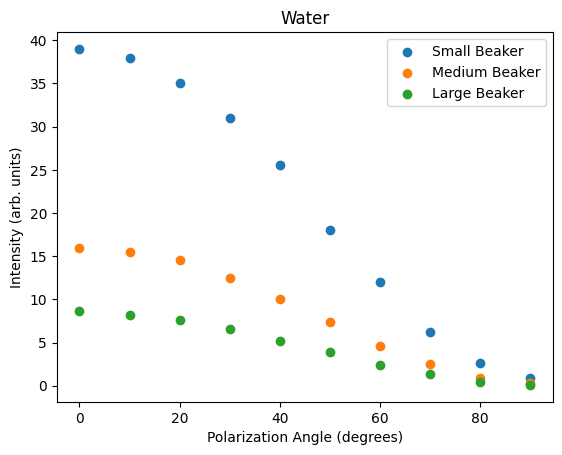

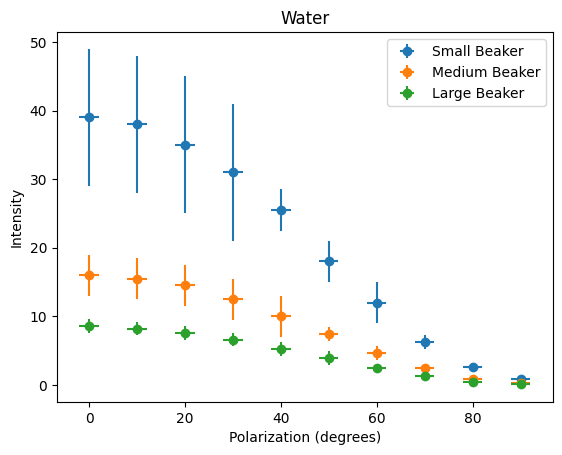

In [175]:
# Small beaker with water
small_beaker_with_water_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_with_water_intensity = np.array([0.88, 2.65, 6.2, 12.0, 18.0, 25.5, 31, 35, 38, 39])

# Medium beaker with water
medium_beaker_with_water_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_with_water_intensity = np.array([0.27, 0.88, 2.50, 4.6, 7.4, 10.0, 12.5, 14.5, 15.5, 16.0])

# Large beaker with water
large_beaker_with_water_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_with_water_intensity = np.array([0.09, 0.43, 1.30, 2.40, 3.9, 5.2, 6.6, 7.6, 8.2, 8.6])

# Intensity error for water
large_beaker_with_water_intensity_error = np.array([0.1, 0.1, 0.3, 0.3, 1, 1, 1, 1, 1, 1])
medium_beaker_with_water_intensity_error = np.array([0.1, 0.1, 0.3, 1, 1, 3, 3, 3, 3, 3])
small_beaker_with_water_intensity_error = np.array([0.1, 0.3, 1, 3, 3, 3, 10, 10, 10, 10])

# Plot the data
plt.scatter(small_beaker_with_water_polarization, small_beaker_with_water_intensity, label='Small Beaker')
plt.scatter(medium_beaker_with_water_polarization, medium_beaker_with_water_intensity, label='Medium Beaker')
plt.scatter(large_beaker_with_water_polarization, large_beaker_with_water_intensity, label='Large Beaker')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.title("Water")
plt.legend(loc='best')
plt.show()

# Plot the data
polarization_v_intensity_by_beaker_size(small_beaker_with_water_polarization, medium_beaker_with_water_polarization,
                                        large_beaker_with_water_polarization, small_beaker_with_water_intensity,
                                        medium_beaker_with_water_intensity, large_beaker_with_water_intensity, 
                                        polarization_error_degrees, small_beaker_with_water_intensity_error, 
                                        medium_beaker_with_water_intensity_error, large_beaker_with_water_intensity_error, "Water")

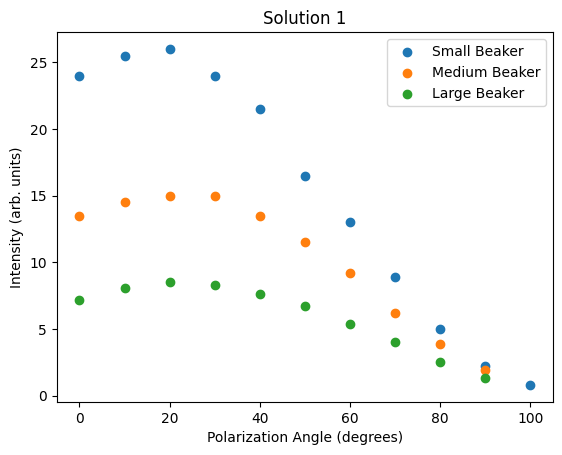

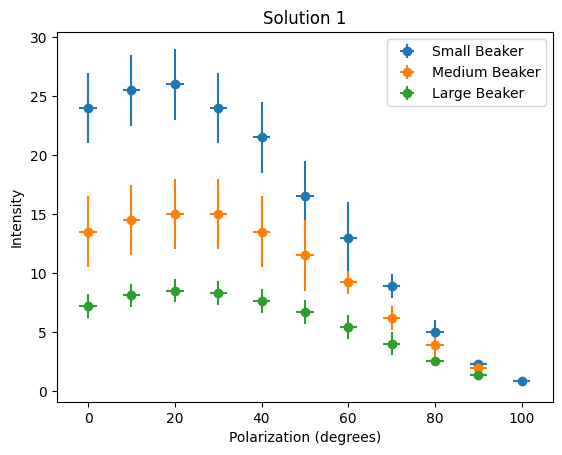

In [184]:
# Solution 1 (300.5 g of sugar, total volume of 1002 mL)

# Large beaker with solution 1
large_beaker_solution1_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_solution1_intensity = np.array([1.30, 2.50, 4.0, 5.40, 6.7, 7.6, 8.3, 8.5, 8.1, 7.2])

# Medium beaker with solution 1
medium_beaker_solution1_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_solution1_intensity = np.array([1.90, 3.9, 6.2, 9.2, 11.5, 13.5, 15.0, 15.0, 14.5, 13.5])

# Small beaker with solution 1
small_beaker_solution1_polarization = np.array([100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_solution1_intensity = np.array([0.8, 2.25, 5.0, 8.9, 13.0, 16.5, 21.5, 24.0, 26.0, 25.5, 24.0])

# Intensity error for solution 1
large_beaker_solution1_intensity_error = np.array([0.3, 0.3, 1, 1, 1, 1, 1, 1, 1, 1])
medium_beaker_solution1_intensity_error = np.array([0.3, 1, 1, 1, 3, 3, 3, 3, 3, 3])
small_beaker_solution1_intensity_error = np.array([0.3, 0.3, 1, 1, 3, 3, 3, 3, 3, 3, 3])
small_beaker_solution1_polarization_error = np.full((len(small_beaker_solution1_polarization), ), 2)

# Plot the data
plt.scatter(small_beaker_solution1_polarization, small_beaker_solution1_intensity, label='Small Beaker')
plt.scatter(medium_beaker_solution1_polarization, medium_beaker_solution1_intensity, label='Medium Beaker')
plt.scatter(large_beaker_solution1_polarization, large_beaker_solution1_intensity, label='Large Beaker')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.title("Solution 1")
plt.legend(loc='best')
plt.show()

# Plot the data
plt.errorbar(small_beaker_solution1_polarization, small_beaker_solution1_intensity, xerr=small_beaker_solution1_polarization_error, yerr=small_beaker_solution1_intensity_error, fmt='o', label='Small Beaker')
plt.errorbar(medium_beaker_solution1_polarization, medium_beaker_solution1_intensity, xerr=polarization_error_degrees, yerr=medium_beaker_solution1_intensity_error, fmt='o', label='Medium Beaker')
plt.errorbar(large_beaker_solution1_polarization, large_beaker_solution1_intensity, xerr=polarization_error_degrees, yerr=large_beaker_solution1_intensity_error, fmt='o', label='Large Beaker')
plt.xlabel('Polarization (degrees)')
plt.ylabel('Intensity')
plt.title("Solution 1")
plt.legend()
plt.show()

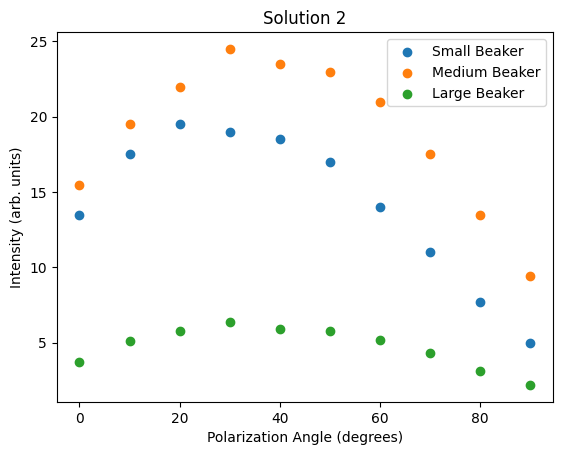

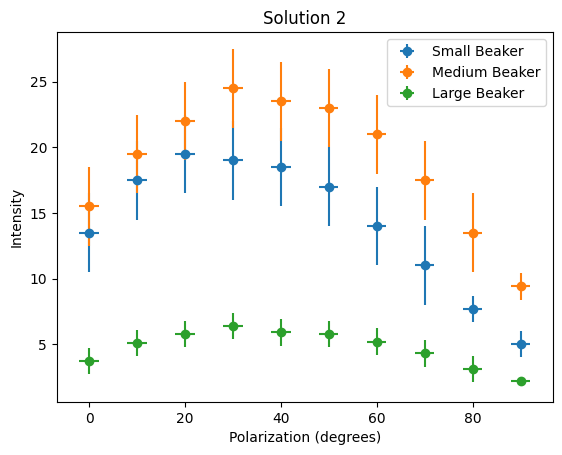

In [181]:
# Solution 2 (600.7 g of sugar, total volume of 1018 mL)

# Large beaker with solution 2
large_beaker_solution2_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_solution2_intensity = np.array([2.2, 3.1, 4.3, 5.2, 5.8, 5.9, 6.4, 5.8, 5.1, 3.7])

# Medium beaker with solution 2
medium_beaker_solution2_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_solution2_intensity = np.array([9.4, 13.5, 17.5, 21.0, 23.0, 23.5, 24.5, 22.0, 19.5, 15.5])

# Small beaker with solution 2
small_beaker_solution2_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_solution2_intensity = np.array([5.0, 7.7, 11.0, 14.0, 17.0, 18.5, 19.0, 19.5, 17.5, 13.5])

# Intensity error for solution 2
large_beaker_solution2_intensity_error = np.array([0.3, 1, 1, 1, 1, 1, 1, 1, 1, 1])
medium_beaker_solution2_intensity_error = np.array([1, 3, 3, 3, 3, 3, 3, 3, 3, 3])
small_beaker_solution2_intensity_error = np.array([1, 1, 3, 3, 3, 3, 3, 3, 3, 3])

# Plot the data
plt.scatter(small_beaker_solution2_polarization, small_beaker_solution2_intensity, label='Small Beaker')
plt.scatter(medium_beaker_solution2_polarization, medium_beaker_solution2_intensity, label='Medium Beaker')
plt.scatter(large_beaker_solution2_polarization, large_beaker_solution2_intensity, label='Large Beaker')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.title("Solution 2")
plt.legend(loc='best')
plt.show()

# Plot the data
polarization_v_intensity_by_beaker_size(small_beaker_solution2_polarization, medium_beaker_solution2_polarization, large_beaker_solution2_polarization, 
                                        small_beaker_solution2_intensity, medium_beaker_solution2_intensity, large_beaker_solution2_intensity, 
                                        polarization_error_degrees, small_beaker_solution2_intensity_error, medium_beaker_solution2_intensity_error, 
                                        large_beaker_solution2_intensity_error, "Solution 2")

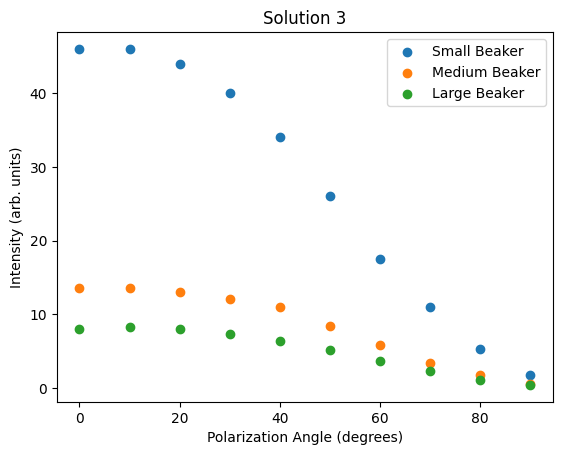

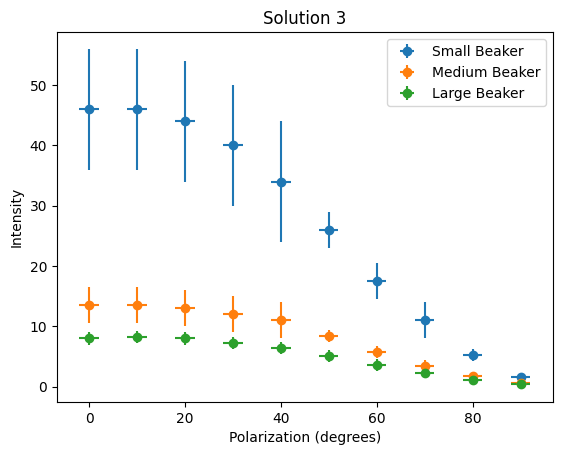

In [182]:
# Solution 3 (150.6 g of sugar, total volume of 1000 mL)

# Large beaker with solution 3
large_beaker_solution3_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_solution3_intensity = np.array([0.405, 1.10, 2.25, 3.6, 5.1, 6.4, 7.3, 8.0, 8.2, 8.0])

# Medium beaker with solution 3
medium_beaker_solution3_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_solution3_intensity = np.array([0.58, 1.75, 3.4, 5.8, 8.4, 11.0, 12.0, 13.0, 13.5, 13.5])

# Small beaker with solution 3
small_beaker_solution3_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_solution3_intensity = np.array([1.70, 5.3, 11.0, 17.5, 26.0, 34, 40, 44, 46, 46])

# Intensity error for solution 3
large_beaker_solution3_intensity_error = np.array([0.1, 0.3, 0.3, 1, 1, 1, 1, 1, 1, 1])
medium_beaker_solution3_intensity_error = np.array([0.1, 0.3, 1, 1, 1, 3, 3, 3, 3, 3])
small_beaker_solution3_intensity_error = np.array([0.3, 1, 3, 3, 3, 10, 10, 10, 10, 10])

# Plot the data
plt.scatter(small_beaker_solution3_polarization, small_beaker_solution3_intensity, label='Small Beaker')
plt.scatter(medium_beaker_solution3_polarization, medium_beaker_solution3_intensity, label='Medium Beaker')
plt.scatter(large_beaker_solution3_polarization, large_beaker_solution3_intensity, label='Large Beaker')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.title("Solution 3")
plt.legend(loc='best')
plt.show()

# Plot the data
polarization_v_intensity_by_beaker_size(small_beaker_solution3_polarization, medium_beaker_solution3_polarization, large_beaker_solution3_polarization, 
                                        small_beaker_solution3_intensity, medium_beaker_solution3_intensity, large_beaker_solution3_intensity, 
                                        polarization_error_degrees, small_beaker_solution3_intensity_error, medium_beaker_solution3_intensity_error, 
                                        large_beaker_solution3_intensity_error, "Solution 3")

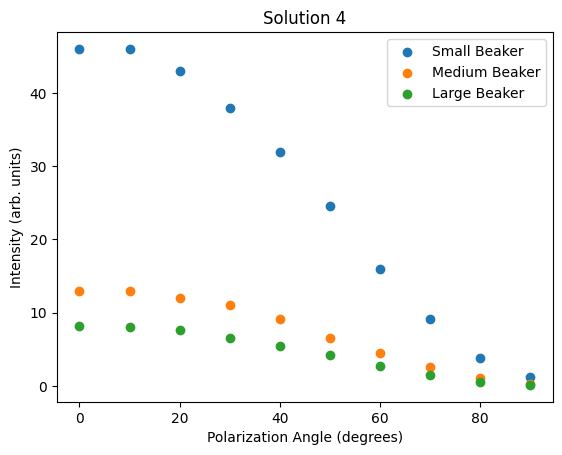

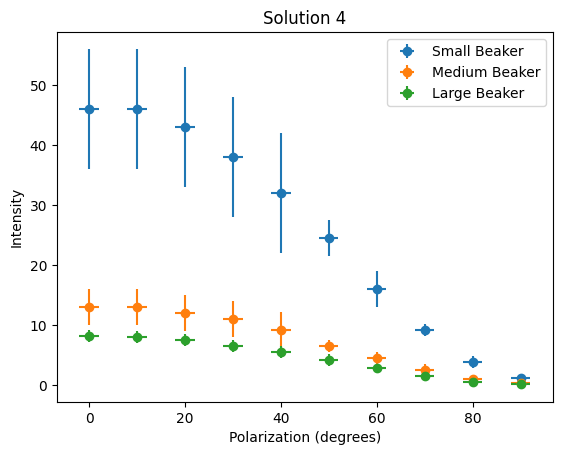

In [183]:
# Solution 4 (75.3 g of sugar, total volume of 1000 mL)

# Large beaker with solution 4
large_beaker_solution4_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_solution4_intensity = np.array([0.15, 0.61, 1.55, 2.80, 4.2, 5.5, 6.6, 7.6, 8.0, 8.2])

# Medium beaker with solution 4
medium_beaker_solution4_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_solution4_intensity = np.array([0.29, 1.05, 2.55, 4.5, 6.6, 9.2, 11.0, 12.0, 13.0, 13.0])

# Small beaker with solution 4
small_beaker_solution4_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_solution4_intensity = np.array([1.20, 3.8, 9.2, 16.0, 24.5, 32, 38, 43, 46, 46])

# Intensity error for solution 4
large_beaker_solution4_intensity_error = np.array([0.1, 0.1, 0.3, 0.3, 1, 1, 1, 1, 1, 1])
medium_beaker_solution4_intensity_error = np.array([0.1, 0.3, 1, 1, 1, 3, 3, 3, 3, 3])
small_beaker_solution4_intensity_error = np.array([0.3, 1, 1, 3, 3, 10, 10, 10, 10, 10])

# Plot the data
plt.scatter(small_beaker_solution4_polarization, small_beaker_solution4_intensity, label='Small Beaker')
plt.scatter(medium_beaker_solution4_polarization, medium_beaker_solution4_intensity, label='Medium Beaker')
plt.scatter(large_beaker_solution4_polarization, large_beaker_solution4_intensity, label='Large Beaker')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.title("Solution 4")
plt.legend(loc='best')
plt.show()

# Plot the data
polarization_v_intensity_by_beaker_size(small_beaker_solution4_polarization, medium_beaker_solution4_polarization, large_beaker_solution4_polarization, 
                                        small_beaker_solution4_intensity, medium_beaker_solution4_intensity, large_beaker_solution4_intensity,
                                        polarization_error_degrees, small_beaker_solution4_intensity_error, medium_beaker_solution4_intensity_error, 
                                        large_beaker_solution4_intensity_error, "Solution 4")

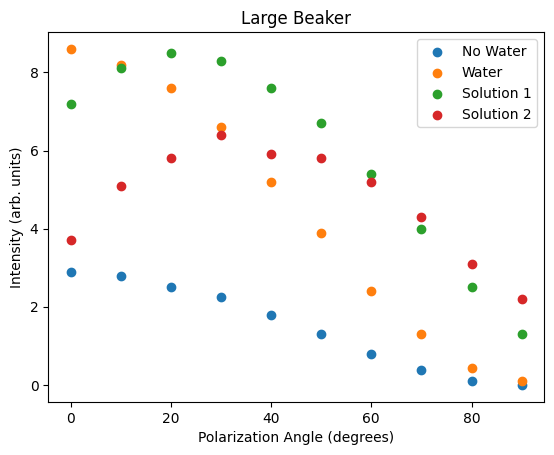

In [134]:
# Large beaker path length plot (108.8 mm)

plt.scatter(large_beaker_polarization, large_beaker_intensity, label='No Water')
plt.scatter(large_beaker_with_water_polarization, large_beaker_with_water_intensity, label='Water')
plt.scatter(large_beaker_solution1_polarization, large_beaker_solution1_intensity, label='Solution 1')
plt.scatter(large_beaker_solution2_polarization, large_beaker_solution2_intensity, label='Solution 2')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.title("Large Beaker")
plt.legend(loc='best')
plt.show()

In [135]:
# Define function to plot

def plot_pol_v_int(polarization, intensity, pol_fit, int_fit, title):
    plt.scatter(polarization, intensity, label='Data')
    plt.plot(pol_fit, int_fit, c='k', label='Fit')
    plt.xlabel('Polarization Angle (radians)')
    plt.ylabel('Intensity (arb. units)')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()


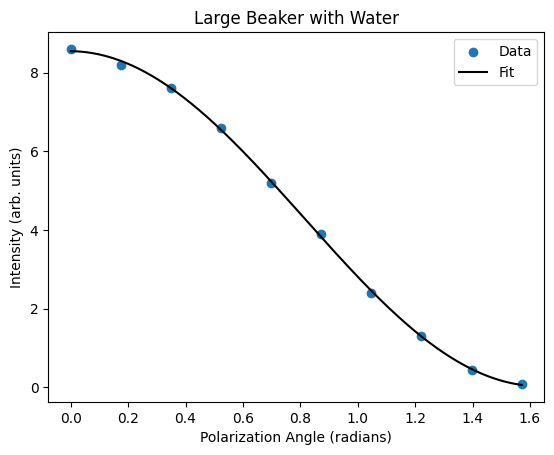

In [136]:
# Attempt to fit with cos function rather than sin for better phase shift

def cos(x, A, B, C, D):
    return A*np.cos(B*x + C) + D

# Large beaker with water curve fiting

large_with_water_optimal_vals = sp.optimize.curve_fit(cos, large_beaker_with_water_polarization, large_beaker_with_water_intensity, p0=(8, 0.1, 0.1, 0))

x = np.linspace(np.min(large_beaker_with_water_polarization), np.max(large_beaker_with_water_polarization), 1000)

plot_pol_v_int(large_beaker_with_water_polarization*np.pi/180, large_beaker_with_water_intensity, x*np.pi/180, cos(x, *large_with_water_optimal_vals[0]), 'Large Beaker with Water')

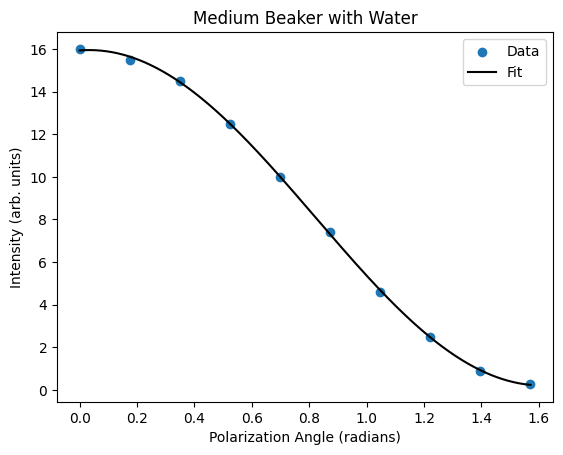

In [137]:
# Medium beaker with water curve fiting

medium_with_water_optimal_vals = sp.optimize.curve_fit(cos, medium_beaker_with_water_polarization, medium_beaker_with_water_intensity, p0=(16, 0.01, 0.1, 0))

x = np.linspace(np.min(medium_beaker_with_water_polarization), np.max(medium_beaker_with_water_polarization), 1000)

plot_pol_v_int(medium_beaker_with_water_polarization*np.pi/180, medium_beaker_with_water_intensity, x*np.pi/180, cos(x, *medium_with_water_optimal_vals[0]), 'Medium Beaker with Water')

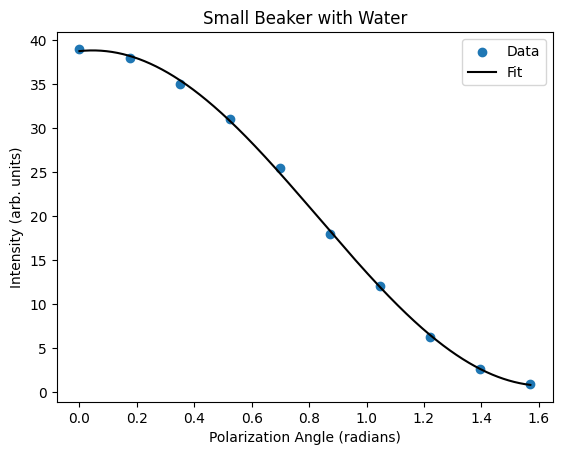

In [138]:
# Small beaker with water curve fiting

small_with_water_optimal_vals = sp.optimize.curve_fit(cos, small_beaker_with_water_polarization, small_beaker_with_water_intensity, p0=(16, 0.01, 0.1, 0))

x = np.linspace(np.min(small_beaker_with_water_polarization), np.max(small_beaker_with_water_polarization), 1000)

plot_pol_v_int(small_beaker_with_water_polarization*np.pi/180, small_beaker_with_water_intensity, x*np.pi/180, cos(x, *small_with_water_optimal_vals[0]), 'Small Beaker with Water')

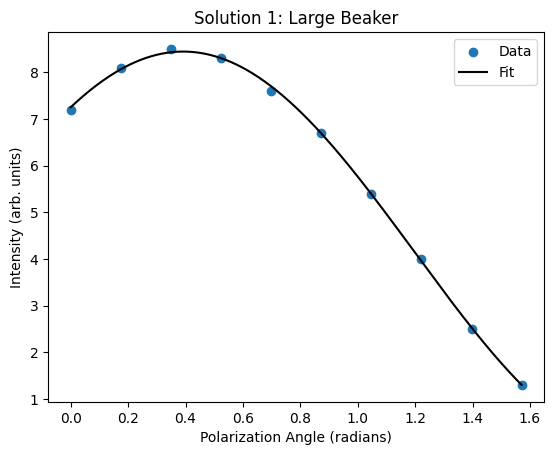

In [139]:
# Solution 1 large beaker curve fitting

large_sln_01_optimal_vals = sp.optimize.curve_fit(cos, large_beaker_solution1_polarization, large_beaker_solution1_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(large_beaker_solution1_polarization), np.max(large_beaker_solution1_polarization), 1000)

plot_pol_v_int(large_beaker_solution1_polarization*np.pi/180, large_beaker_solution1_intensity, x*np.pi/180, cos(x, *large_sln_01_optimal_vals[0]), 'Solution 1: Large Beaker')

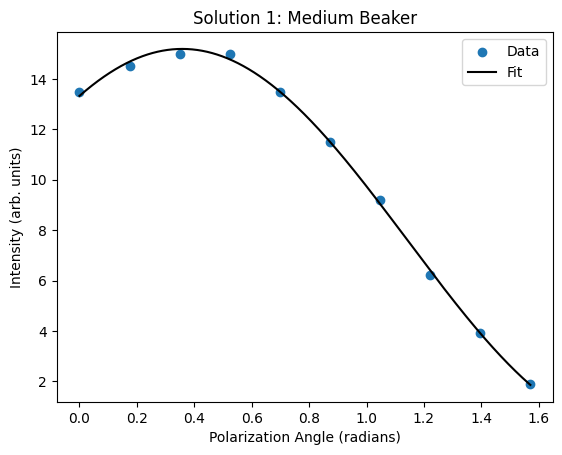

In [140]:
# Solution 1 medium beaker curve fitting

medium_sln_01_optimal_vals = sp.optimize.curve_fit(cos, medium_beaker_solution1_polarization, medium_beaker_solution1_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(medium_beaker_solution1_polarization), np.max(medium_beaker_solution1_polarization), 1000)

plot_pol_v_int(medium_beaker_solution1_polarization*np.pi/180, medium_beaker_solution1_intensity, x*np.pi/180, cos(x, *medium_sln_01_optimal_vals[0]), 'Solution 1: Medium Beaker')

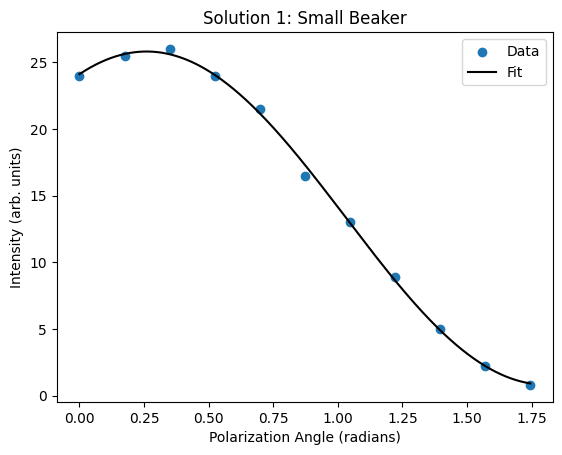

In [141]:
# Solution 1 small beaker curve fitting

small_sln_01_optimal_vals = sp.optimize.curve_fit(cos, small_beaker_solution1_polarization, small_beaker_solution1_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(small_beaker_solution1_polarization), np.max(small_beaker_solution1_polarization), 1000)

plot_pol_v_int(small_beaker_solution1_polarization*np.pi/180, small_beaker_solution1_intensity, x*np.pi/180, cos(x, *small_sln_01_optimal_vals[0]), 'Solution 1: Small Beaker')

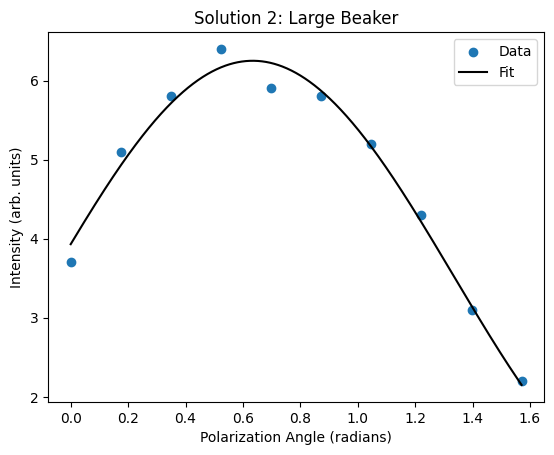

In [142]:
# Solution 2 large beaker curve fitting

large_sln_02_optimal_vals = sp.optimize.curve_fit(cos, large_beaker_solution2_polarization, large_beaker_solution2_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(large_beaker_solution2_polarization), np.max(large_beaker_solution2_polarization), 1000)

plot_pol_v_int(large_beaker_solution2_polarization*np.pi/180, large_beaker_solution2_intensity, x*np.pi/180, cos(x, *large_sln_02_optimal_vals[0]), 'Solution 2: Large Beaker')

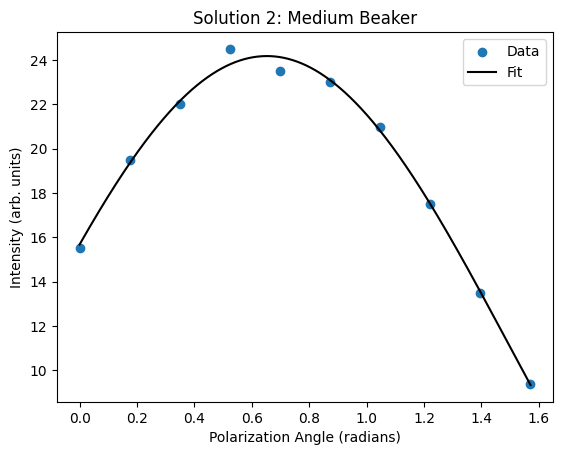

In [143]:
# Solution 2 medium beaker curve fitting

medium_sln_02_optimal_vals = sp.optimize.curve_fit(cos, medium_beaker_solution2_polarization, medium_beaker_solution2_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(medium_beaker_solution2_polarization), np.max(medium_beaker_solution2_polarization), 1000)

plot_pol_v_int(medium_beaker_solution2_polarization*np.pi/180, medium_beaker_solution2_intensity, x*np.pi/180, cos(x, *medium_sln_02_optimal_vals[0]), 'Solution 2: Medium Beaker')

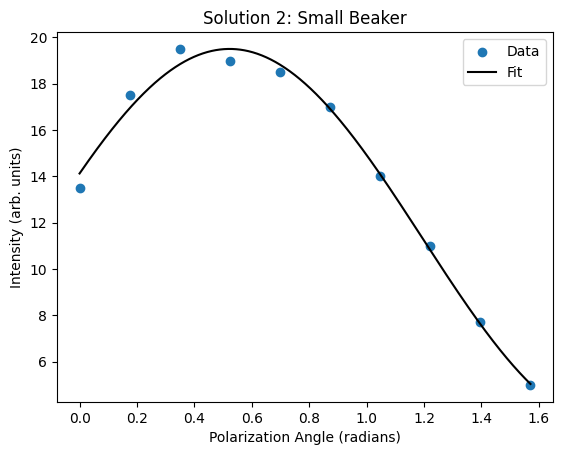

In [144]:
# Solution 2 small beaker curve fitting

small_sln_02_optimal_vals = sp.optimize.curve_fit(cos, small_beaker_solution2_polarization, small_beaker_solution2_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(small_beaker_solution2_polarization), np.max(small_beaker_solution2_polarization), 1000)

plot_pol_v_int(small_beaker_solution2_polarization*np.pi/180, small_beaker_solution2_intensity, x*np.pi/180, cos(x, *small_sln_02_optimal_vals[0]), 'Solution 2: Small Beaker')

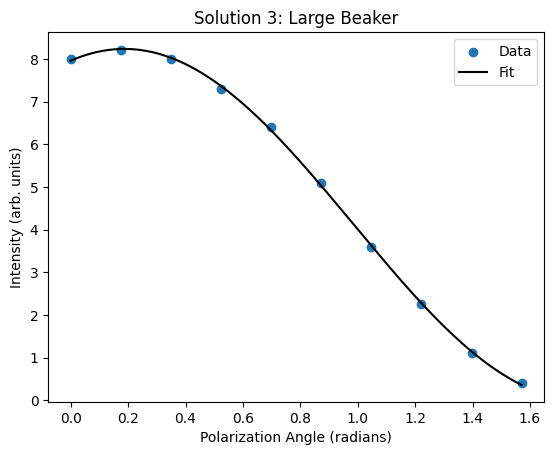

In [145]:
# Solution 3 large beaker curve fitting

large_sln_03_optimal_vals = sp.optimize.curve_fit(cos, large_beaker_solution3_polarization, large_beaker_solution3_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(large_beaker_solution3_polarization), np.max(large_beaker_solution3_polarization), 1000)

plot_pol_v_int(large_beaker_solution3_polarization*np.pi/180, large_beaker_solution3_intensity, x*np.pi/180, cos(x, *large_sln_03_optimal_vals[0]), 'Solution 3: Large Beaker')

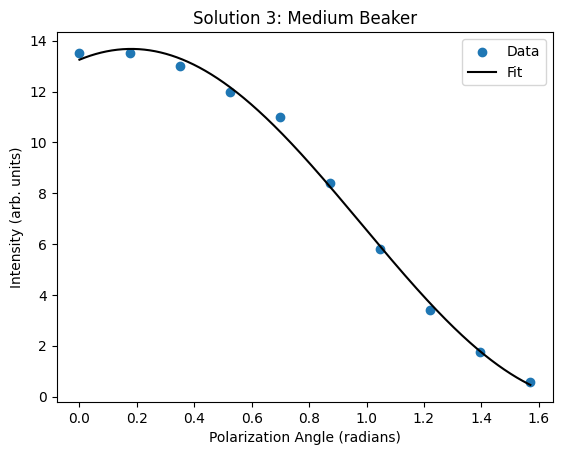

In [146]:
# Solution 3 medium beaker curve fitting

medium_sln_03_optimal_vals = sp.optimize.curve_fit(cos, medium_beaker_solution3_polarization, medium_beaker_solution3_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(medium_beaker_solution3_polarization), np.max(medium_beaker_solution3_polarization), 1000)

plot_pol_v_int(medium_beaker_solution3_polarization*np.pi/180, medium_beaker_solution3_intensity, x*np.pi/180, cos(x, *medium_sln_03_optimal_vals[0]), 'Solution 3: Medium Beaker')

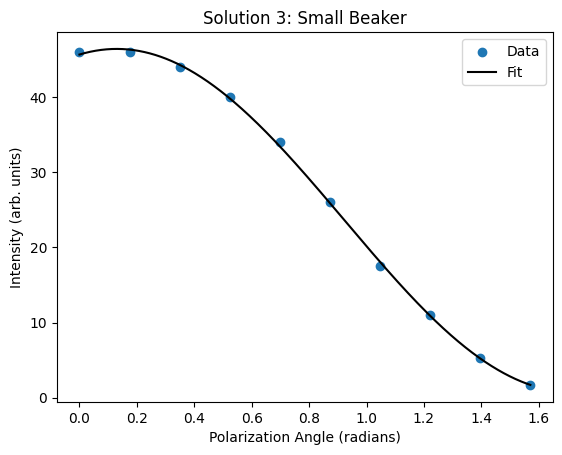

In [147]:
# Solution 3 small beaker curve fitting

small_sln_03_optimal_vals = sp.optimize.curve_fit(cos, small_beaker_solution3_polarization, small_beaker_solution3_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(small_beaker_solution3_polarization), np.max(small_beaker_solution3_polarization), 1000)

plot_pol_v_int(small_beaker_solution3_polarization*np.pi/180, small_beaker_solution3_intensity, x*np.pi/180, cos(x, *small_sln_03_optimal_vals[0]), 'Solution 3: Small Beaker')

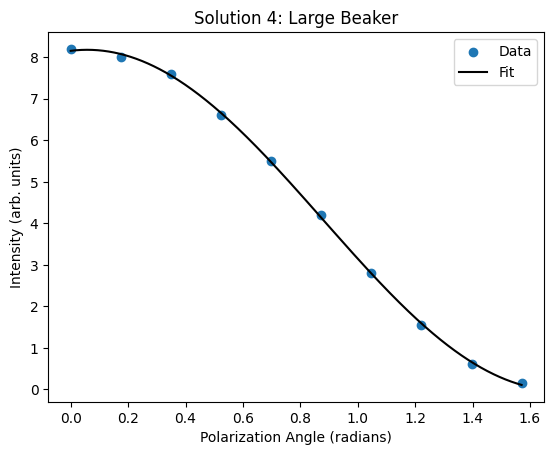

In [148]:
# Solution 4 large beaker curve fitting

large_sln_04_optimal_vals = sp.optimize.curve_fit(cos, large_beaker_solution4_polarization, large_beaker_solution4_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(large_beaker_solution4_polarization), np.max(large_beaker_solution4_polarization), 1000)

plot_pol_v_int(large_beaker_solution4_polarization*np.pi/180, large_beaker_solution4_intensity, x*np.pi/180, cos(x, *large_sln_04_optimal_vals[0]), 'Solution 4: Large Beaker')

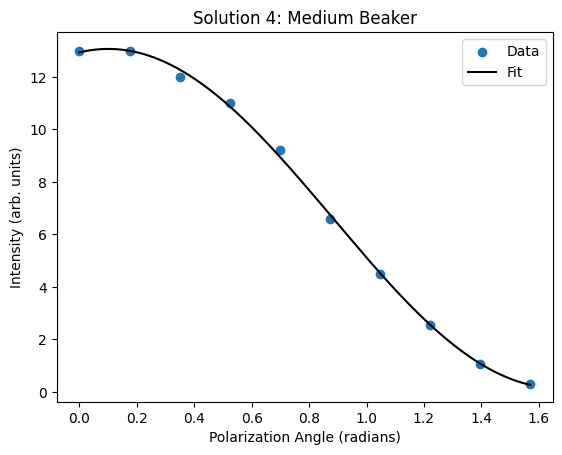

In [149]:
# Solution 4 medium beaker curve fitting

medium_sln_04_optimal_vals = sp.optimize.curve_fit(cos, medium_beaker_solution4_polarization, medium_beaker_solution4_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(medium_beaker_solution4_polarization), np.max(medium_beaker_solution4_polarization), 1000)

plot_pol_v_int(medium_beaker_solution4_polarization*np.pi/180, medium_beaker_solution4_intensity, x*np.pi/180, cos(x, *medium_sln_04_optimal_vals[0]), 'Solution 4: Medium Beaker')

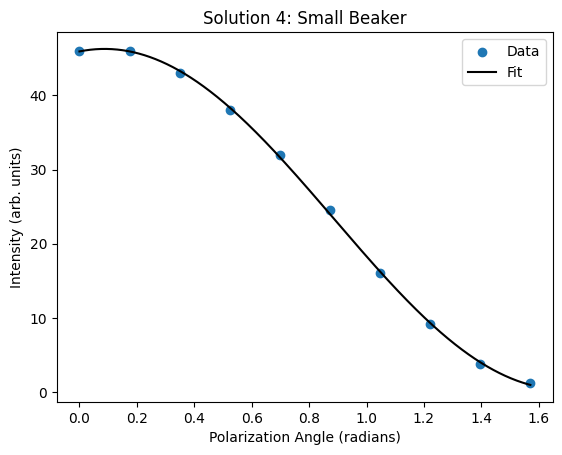

In [150]:
# Solution 4 small beaker curve fitting

small_sln_04_optimal_vals = sp.optimize.curve_fit(cos, small_beaker_solution4_polarization, small_beaker_solution4_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(small_beaker_solution4_polarization), np.max(small_beaker_solution4_polarization), 1000)

plot_pol_v_int(small_beaker_solution4_polarization*np.pi/180, small_beaker_solution4_intensity, x*np.pi/180, cos(x, *small_sln_04_optimal_vals[0]), 'Solution 4: Small Beaker')

In [151]:
# Plot the phase shifts verus solution concentration

def plot(phase_shifts, concentrations):
    plt.scatter(concentrations, phase_shifts)
    plt.xlabel('Concentration (g/mL)')
    plt.ylabel('Phase Shift (radians)')
large_with_water_phase_shift = large_with_water_optimal_vals[0][2]
medium_with_water_phase_shift = medium_with_water_optimal_vals[0][2]
small_with_water_phase_shift = small_with_water_optimal_vals[0][2]
large_sln_01_phase_shift = large_sln_01_optimal_vals[0][2]
medium_sln_01_phase_shift = medium_sln_01_optimal_vals[0][2]
small_sln_01_phase_shift = small_sln_01_optimal_vals[0][2]
large_sln_02_phase_shift = large_sln_02_optimal_vals[0][2]
medium_sln_02_phase_shift = medium_sln_02_optimal_vals[0][2]
small_sln_02_phase_shift = small_sln_02_optimal_vals[0][2]
large_sln_03_phase_shift = large_sln_03_optimal_vals[0][2]
medium_sln_03_phase_shift = medium_sln_03_optimal_vals[0][2]
small_sln_03_phase_shift = small_sln_03_optimal_vals[0][2]
large_sln_04_phase_shift = large_sln_04_optimal_vals[0][2]
medium_sln_04_phase_shift = medium_sln_04_optimal_vals[0][2]
small_sln_04_phase_shift = small_sln_04_optimal_vals[0][2]

print (large_sln_01_optimal_vals[0][2])

solutions = ['Solution 1', 'Solution 2']
phase_shifts = [large_with_water_phase_shift, large_sln_01_phase_shift, medium_sln_01_phase_shift, small_sln_01_phase_shift, large_sln_02_phase_shift, medium_sln_02_phase_shift, small_sln_02_phase_shift, large_sln_03_phase_shift, medium_sln_03_phase_shift, small_sln_03_phase_shift, large_sln_04_phase_shift, medium_sln_04_phase_shift, small_sln_04_phase_shift]
concentrations = [0, 300.5/1002, 600.7/1018, 150.6/1000, 75.3/1000]

-0.7647688349259242


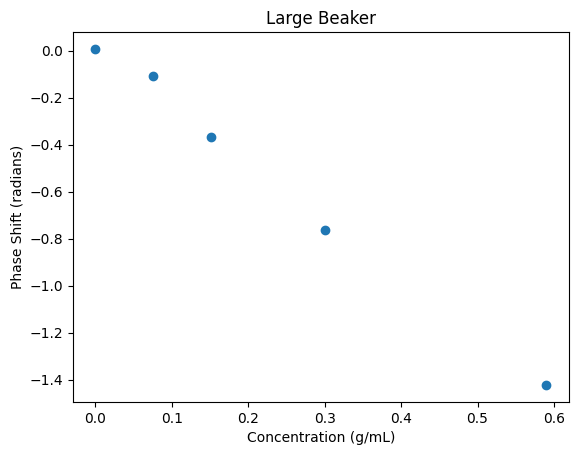

In [152]:
# Phase shift versus concentration for large beaker

large_beaker_phase_shifts = [large_with_water_phase_shift, large_sln_01_phase_shift, large_sln_02_phase_shift, large_sln_03_phase_shift, large_sln_04_phase_shift]

plt.scatter(concentrations, large_beaker_phase_shifts)
plt.xlabel('Concentration (g/mL)')
plt.ylabel('Phase Shift (radians)')
plt.title('Large Beaker')
plt.show()

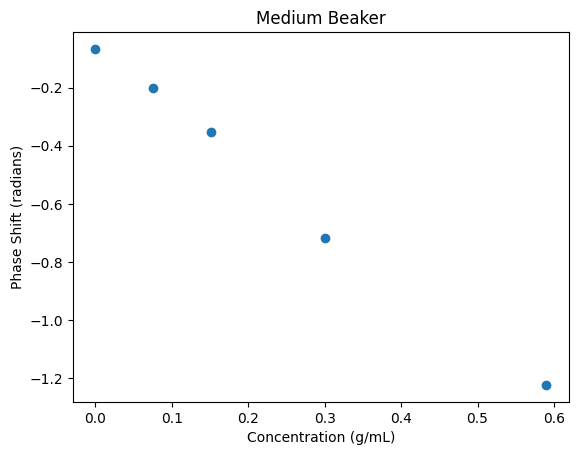

In [153]:
# Phase shift versus concentration for medium beaker

medium_beaker_phase_shifts = [medium_with_water_phase_shift, medium_sln_01_phase_shift, medium_sln_02_phase_shift, medium_sln_03_phase_shift, medium_sln_04_phase_shift]

plt.scatter(concentrations, medium_beaker_phase_shifts)
plt.xlabel('Concentration (g/mL)')
plt.ylabel('Phase Shift (radians)')
plt.title('Medium Beaker')
plt.show()

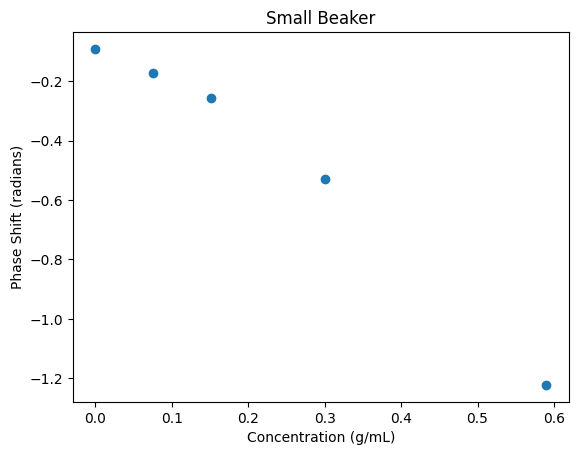

In [154]:
# Phase shift versus concentration for small beaker

small_beaker_phase_shifts = [small_with_water_phase_shift, small_sln_01_phase_shift, small_sln_02_phase_shift, small_sln_03_phase_shift, small_sln_04_phase_shift]

plt.scatter(concentrations, small_beaker_phase_shifts)
plt.xlabel('Concentration (g/mL)')
plt.ylabel('Phase Shift (radians)')
plt.title('Small Beaker')
plt.show()